In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

In [2]:
# Generate sine wave data
def generate_sine_wave(seq_length, num_samples):
    x = np.linspace(0, 50, num_samples)
    y = np.sin(x)
    return y

# Prepare data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:(i + seq_length)]
        target = data[i + seq_length]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

In [3]:
# LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        # Get the outputs from the last time step
        out = self.fc(out[:, -1, :])
        return out

In [4]:
# Parameters
seq_length = 20
num_samples = 1000
learning_rate = 0.01
epochs = 200

# Generate and prepare data
sine_data = generate_sine_wave(seq_length, num_samples)
X, y = create_sequences(sine_data, seq_length)

# Convert to PyTorch tensors
X = torch.FloatTensor(X).reshape(-1, seq_length, 1)
y = torch.FloatTensor(y).reshape(-1, 1)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [5]:
# Initialize model, loss function, and optimizer
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/200], Loss: 0.0292
Epoch [40/200], Loss: 0.0023
Epoch [60/200], Loss: 0.0007
Epoch [80/200], Loss: 0.0002
Epoch [100/200], Loss: 0.0001
Epoch [120/200], Loss: 0.0001
Epoch [140/200], Loss: 0.0000
Epoch [160/200], Loss: 0.0000
Epoch [180/200], Loss: 0.0000
Epoch [200/200], Loss: 0.0000


torch.Size([196, 20, 1])
Test Loss: 0.0000


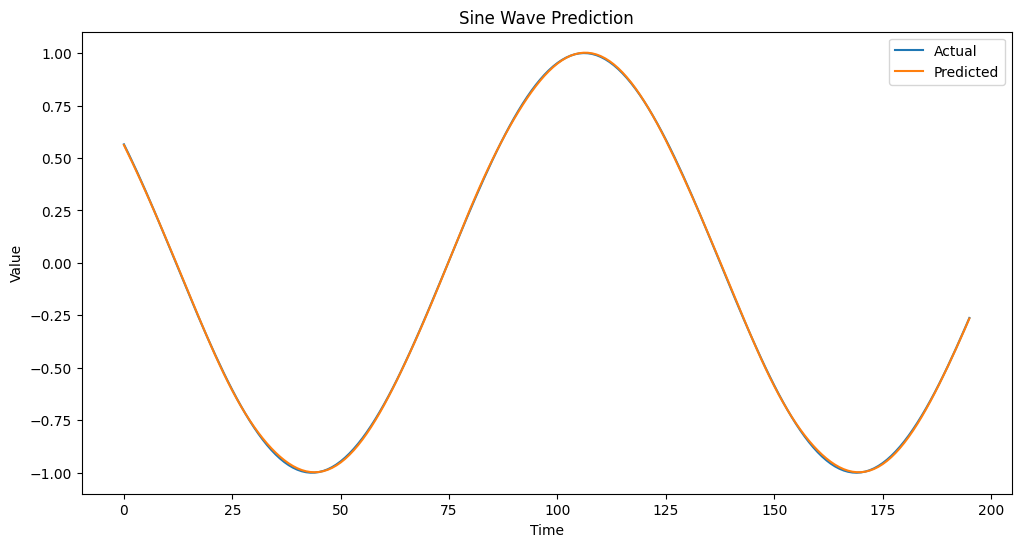

In [7]:
# Testing
model.eval()
print(X_test.shape)
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test.numpy(), label='Actual')
plt.plot(predictions.numpy(), label='Predicted')
plt.title('Sine Wave Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()